# Récupération des données

## Importation des librairies nécessaires.

In [34]:
import requests_cache
import pandas as pd

from movieReview_app import webScraping as ws
from movieReview_app import preprocessing as preproc
from movieReview_app import interface
from movieReview_app import training as train

## Variables globales

In [35]:
APP_PATH = "movieReview_app"

## Mise en place du cache

In [36]:
requests_cache.install_cache("movie_review", backend="sqlite", expire_after=7200)


## Pages à scraper

In [37]:

pages_to_scrap = [
    "https://www.allocine.fr/film/fichefilm-281203/critiques/spectateurs/",
    "https://www.allocine.fr/film/fichefilm-143692/critiques/spectateurs/"
    ]

## Scraping

In [38]:
for page in pages_to_scrap:
    print(f"Scraping de la page {page}.")

    title, data = ws.browse_doc(page)
    print("Page scrapée !")

    print("Extrait du dataset :")
    print("\n")
    print(data.head())
    print("\n")

    print("Enregistrement du dataset archivé.")
    compression_opts = dict(method='zip', archive_name='data.csv') 
    data.to_csv(f"{APP_PATH}/data/{title}.zip", index=False, compression=compression_opts)
    print("Dataset enregistré !")
    
    print("---------------------------------")
    
print("Scraping terminé !")
print("---------------------------------")
print("\n")

Scraping de la page https://www.allocine.fr/film/fichefilm-281203/critiques/spectateurs/.
Chargement de la page associée à l'URL entrée.
Page chargée !
Film analysé : Sonic 2 le film
Nombre de pages à scraper : 8
---------------------------------
Chargement des données de la page 1.
Page chargée !
Récupération des commentaires.
Récupération des notes.
Données de la page 1 récupérées !
---------------------------------
Chargement des données de la page 2.
Page chargée !
Récupération des commentaires.
Récupération des notes.
Données de la page 2 récupérées !
---------------------------------
Chargement des données de la page 3.
Page chargée !
Récupération des commentaires.
Récupération des notes.
Données de la page 3 récupérées !
---------------------------------
Chargement des données de la page 4.
Page chargée !
Récupération des commentaires.
Récupération des notes.
Données de la page 4 récupérées !
---------------------------------
Chargement des données de la page 5.
Page chargée !
R

# Préparation des données.

## Récupération des données enregistrées

In [39]:
# Affectation des noms de film étudiés
movies_to_scrap = ["Sonic 2 le film", "Inception"]

# Chargement des données
print("Chargement des données csv.")
data = pd.DataFrame()
data = pd.concat(
    [pd.read_csv(f"{APP_PATH}/data/{movie}.zip") for movie in movies_to_scrap]
    )
print("Données chargées !")
print("---------------------------------")

# Affichage des informations du dataset
print("Informations concernant le dataset :\n")
print(data.info())
print("---------------------------------")
print("Extrait du dataset :")
print(data.head())
print("---------------------------------")


Chargement des données csv.
Données chargées !
---------------------------------
Informations concernant le dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7259 entries, 0 to 7152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   7259 non-null   float64
 1   comment  7258 non-null   object 
dtypes: float64(1), object(1)
memory usage: 170.1+ KB
None
---------------------------------
Extrait du dataset :
   rating                                            comment
0     4.0  une bonne suite pour les aventures de sonic au...
1     5.0  Cette suite de sonic est incroyable !\nLe fan ...
2     3.0  Malgré deux nouveaux personnages de l'univers ...
3     4.0  Super film de ouf, le fait que Knuckles soit d...
4     4.0  Très bon film ont retrouve ce qui fait l’espri...
---------------------------------


## Tokenization

In [40]:
# Tokenization des données
data = preproc.tokenization(data)

# Détails du dataset tokenizé
print("Informations concernant le dataset tokenizé :")
print(data.info())
print("---------------------------------")
print("Extrait du dataset tokenizé :")
print(data.head())
print("---------------------------------")

Informations concernant le dataset tokenizé :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  7258 non-null   float64
 1   tokens  7258 non-null   object 
dtypes: float64(1), object(1)
memory usage: 170.1+ KB
None
---------------------------------
Extrait du dataset tokenizé :
   rating                                             tokens
0     4.0  bonne suite aventures sonic cinéma deja premie...
1     5.0  cette suite sonic incroyable fan ravi 1992 qua...
2     3.0  malgré deux nouveaux personnages univers jeu v...
3     4.0  super film ouf fait knuckles côté eggman début...
4     4.0  très bon film retrouve fait esprit sonic film ...
---------------------------------


## Préparation des libellés

In [41]:
# Restructuration des données en tokens - opinion
data = preproc.calculate_opinion(data)

# Détails du dataset
print("Informations concernant le dataset prétraîté :")
print(data.info())
print("---------------------------------")
print("Extrait du dataset prétraîté :")
print(data.head())
print("---------------------------------")

Informations concernant le dataset prétraîté :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7152
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    7258 non-null   object
 1   opinions  7258 non-null   object
dtypes: object(2)
memory usage: 170.1+ KB
None
---------------------------------
Extrait du dataset prétraîté :
                                              tokens  opinions
0  bonne suite aventures sonic cinéma deja premie...  positive
1  cette suite sonic incroyable fan ravi 1992 qua...  positive
2  malgré deux nouveaux personnages univers jeu v...  positive
3  super film ouf fait knuckles côté eggman début...  positive
4  très bon film retrouve fait esprit sonic film ...  positive
---------------------------------


## Finalisation de nos jeux de données

Information concernant les données vectorisées :
Type de données : <class 'scipy.sparse._csr.csr_matrix'>
Dimmensions des données : (7258, 20046)
---------------------------------


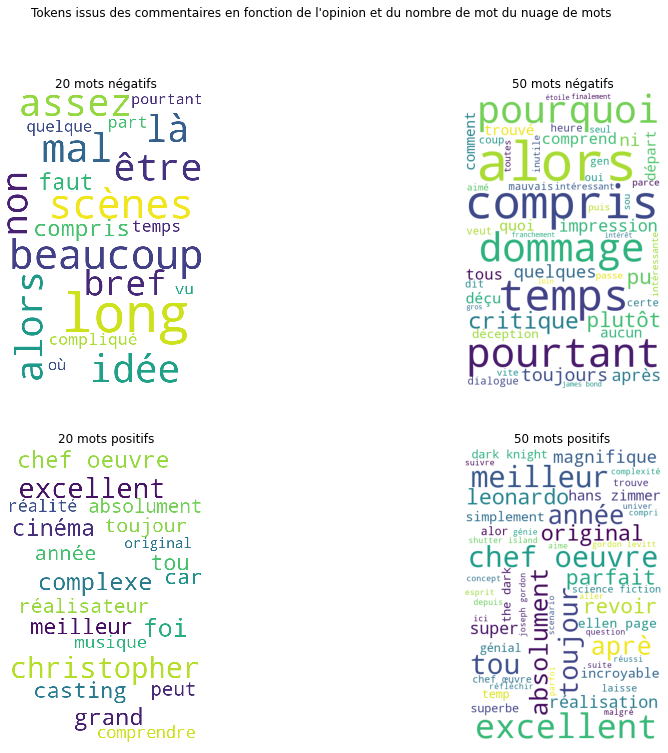

In [42]:
vectorizer = preproc.vectorizer(data.tokens)

# Vectorisation
tokens_one_hot = vectorizer.transform(data.tokens)
print("Information concernant les données vectorisées :")
print("Type de données : "+ str(type(tokens_one_hot)))
print("Dimmensions des données : " + str(tokens_one_hot.shape))
print("---------------------------------")

# Comparaison des différents nuages de mots générés
interface.wordclouds_comparison()

# Préparation du modèle et des jeux de données (entrainement & test)

## Chargement des données

In [43]:


print("Chargement des données csv.")
# data = pd.DataFrame()
data =pd.read_csv(f"{APP_PATH}/data/data_preprocessed.zip", keep_default_na=False)
data.index = [i for i in range(len(data.index))]
print("Données chargées !")
print("---------------------------------")

Chargement des données csv.
Données chargées !
---------------------------------



## Affichage des informations du dataset

In [44]:

print("Informations concernant le dataset :\n")
print(data.info())
print("---------------------------------")
print("Extrait du dataset :")
print(data.head())
print("---------------------------------")

Informations concernant le dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7257
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    7258 non-null   object
 1   opinions  7258 non-null   object
dtypes: object(2)
memory usage: 170.1+ KB
None
---------------------------------
Extrait du dataset :
                                              tokens  opinions
0  bonne suite aventures sonic cinéma deja premie...  positive
1  cette suite sonic incroyable fan ravi 1992 qua...  positive
2  malgré deux nouveaux personnages univers jeu v...  positive
3  super film ouf fait knuckles côté eggman début...  positive
4  très bon film retrouve fait esprit sonic film ...  positive
---------------------------------


## Séparation des données en caractéristiques/cibles et entraînement/test

In [45]:
from sklearn.model_selection import train_test_split

print("Séparation des données.")
X_train, X_test, y_train, y_test = train_test_split(
    data.tokens, 
    data.opinions, 
    stratify=data.opinions, 
    test_size=.2, 
    random_state=42
)
print("Données séparées !")
print("---------------------------------")

Séparation des données.
Données séparées !
---------------------------------


## Affectation des mots vides

In [46]:

# print("Chargement des mots vides issus des nuages de mots.")
# stopwords = preproc.wordcloud(data)
# print("Mots vides chargés !")
# print("---------------------------------")



## Encodage des caractéristiques et des cibles
    

In [47]:
from sklearn.preprocessing import LabelEncoder

print("Encodage des données.")
# vectorizer = preproc.vectorizer(X_train, stop_words=stopwords)
vectorizer = preproc.vectorizer(X_train)
le = LabelEncoder().fit(y_train)
X_train, X_test, y_train, y_test = train.encoding(vectorizer, le, X_train, X_test, y_train, y_test)
print("Données encodées !")
print("---------------------------------")

Encodage des données.
Données encodées !
---------------------------------


## Affectation du pipeline de traîtement des données

In [51]:

print("Traîtement de données :")
pipe = train.pipe_reg_logistic(X_train, y_train)
print("\n")
print("Informations concernant le modèle :")
etapes = [str(pipe.get_params()['steps'][i][1]).split('(')[0] for i in range(len(pipe.get_params()['steps']))]
print(f"\
    Étapes : \n\
        {etapes[0]}\n\
        {etapes[1]}\n\
    Critère d'évaluation : {pipe.get_params()['classifier__scoring'].upper()}\n\r\
    Algorithme : {pipe.get_params()['classifier__solver']}\
")
print("---------------------------------")

Traîtement de données :
Création du pipeline
Pipeline créé !
Entraînement du pipeline.
Pipeline entraîné !


Informations concernant le modèle :
    Etapes : 
        StandardScaler
        LogisticRegressionCV
    Critère d'évaluation : F1
    Algorithme : liblinear
---------------------------------


# Analyse des résultats

## Évaluation des résultats

Résultats de la prédiction :


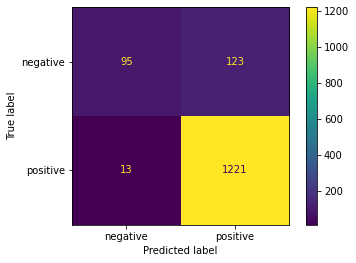

Score : 0.9472459270752521
---------------------------------


In [49]:

print("Résultats de la prédiction :")
score = train.evaluating(le, pipe, X_test, y_test)
print(f"Score : {score}")
print("---------------------------------")

## Enregistrement du modèle

In [50]:
import joblib
import datetime

print("Enregistrement des modèles.")
now = datetime.datetime.now().strftime("%Y%m%d-%H%M")
joblib.dump(vectorizer, f"{APP_PATH}/models/{now}_CountVectorizer.z")
joblib.dump(pipe, f"{APP_PATH}/models/{now}_{str(etapes[0])}_{score:.2f}.z")
print("Modèles enregistrés !")

Enregistrement des modèles.
Modèles enregistrés !
